### Полиномиальная регрессия. Как из линейной регрессии сделать криволинейную?

Линейная модель (прямая линия):
![img](http://neerc.ifmo.ru/wiki/images/f/f0/Linear_regression_example.png)

***А что если нельзя провести оптимальную прямую линию?***
<a href="https://ibb.co/XXBwvBP"><img src="https://i.ibb.co/Wn9TY9X/9.jpg" alt="9" border="0"></a>

Нужно использовать нелинейную модель:
![img](https://www.machinelearningmastery.ru/img/0-399364-636329.png)

***Модель полиномиальной регрессии (polynomial regression)*** - это обобщенная линейная модель с параметризованной степенью многочлена.

![img](https://russianblogs.com/images/753/361716febc5a15ae65cdba4394db1f69.png)

Многочлен 1-й степени:

$$ y=ax+b $$

Многочлен 3-й степени:
$$ y = ax^3 + bx^2 + cx + d $$

Несмотря на то, что мы можем использовать полиномиальную регрессию для моделирования нелинейных связей, она по-прежнему рассматривается как модель множественной линейной регрессии, ввиду
линейных коэффициентов регрессии.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # Класс преобразователь

[Ссылка на документацию](https://scikit-learn.org/stable/modules/preprocessing.html#polynomial-features)

In [ ]:
# Моделируем данные
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

In [ ]:
X

array([[258.],
       [270.],
       [294.],
       [320.],
       [342.],
       [368.],
       [396.],
       [446.],
       [480.],
       [586.]])

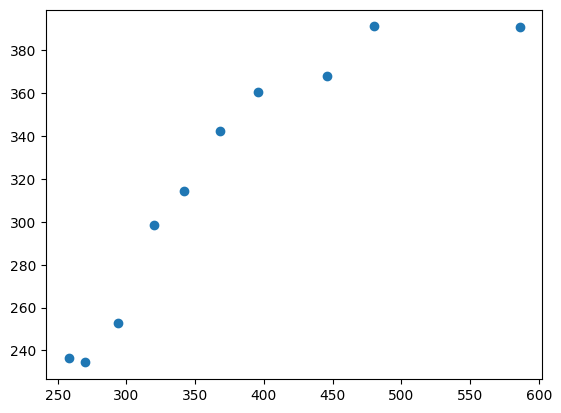

In [ ]:
plt.scatter(X, y)

In [ ]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X, y) # Обучим линейную регрессию

LinearRegression()

In [ ]:
X_ = np.arange(250, 600, 10)[:, np.newaxis] # Точки для предсказания
y_lr = lr.predict(X_) # Предсказываем y для линейной регрессии

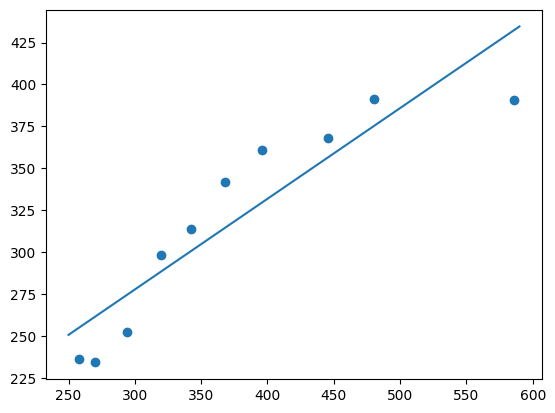

In [ ]:
plt.scatter(X, y)
plt.plot(X_, y_lr)

In [ ]:
pr = LinearRegression() # Полиномиальная регрессия

In [ ]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)       # Преобразуем данные

In [ ]:
X_quad

array([[1.00000e+00, 2.58000e+02, 6.65640e+04],
       [1.00000e+00, 2.70000e+02, 7.29000e+04],
       [1.00000e+00, 2.94000e+02, 8.64360e+04],
       [1.00000e+00, 3.20000e+02, 1.02400e+05],
       [1.00000e+00, 3.42000e+02, 1.16964e+05],
       [1.00000e+00, 3.68000e+02, 1.35424e+05],
       [1.00000e+00, 3.96000e+02, 1.56816e+05],
       [1.00000e+00, 4.46000e+02, 1.98916e+05],
       [1.00000e+00, 4.80000e+02, 2.30400e+05],
       [1.00000e+00, 5.86000e+02, 3.43396e+05]])

In [ ]:
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию

LinearRegression()

In [ ]:
y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии

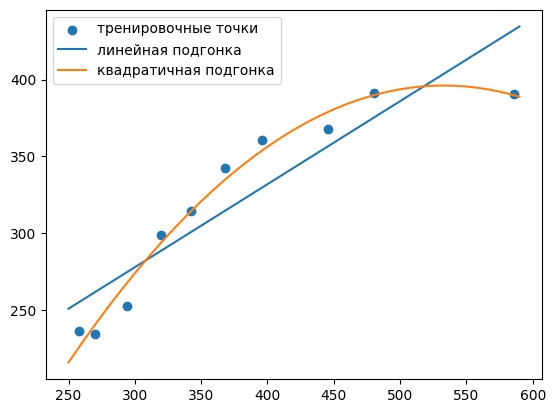

In [ ]:
plt.scatter(X, y, label = 'тренировочные точки')
plt.plot(X_, y_lr, label = 'линейная подгонка')
plt.plot(X_, y_pr, label = 'квадратичная подгонка')
plt.legend(loc='upper left')
plt.show()

### Задание 1. Оцените полученные модели с помощью коэффициента детерминации и MSE. Что можно сказать о качестве моделей?

Замечание!!! mean_squared_error принимает 1-м аргументом истинные значения y, а 2-м предсказанные (см. документацию!).
Получается, для линейной регрессии:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  # импортируем MSE и Коэффициент детерминации

y_pred = lr.predict(X) # предсказание для линейной
MSE_lr = mean_squared_error(y, y_pred) #  вычисляем MSE для линейной
print('MSE для линейной регрессии:', MSE_lr)
r2_lr = r2_score(y, y_pred) #  вычисляем коэффициент детерминации для линейной
print('Коэффициент детерминации для линейной регрессии:', r2_lr)

y_pred = pr.predict(X_quad)
MSE_pr = mean_squared_error(y, y_pred)
print('\nMSE для полиномиальной регрессии:', MSE_pr)
r2_pr = r2_score(y, y_pred)
print('Коэффициент детерминации для полиномиальной регрессии:', r2_pr)

MSE для линейной регрессии: 569.7796663183207
Коэффициент детерминации для линейной регрессии: 0.8317053837891232

MSE для полиномиальной регрессии: 61.33021451744772
Коэффициент детерминации для полиномиальной регрессии: 0.9818850241163604


In [ ]:
'''
По коэффициенту детерминации и MSE видно, что полиномиальная модель лучше, так как значение коэффициента детерминации у неё выше и ближе к 1,
а MSE ниже (чем меньше, тем лучше)
'''

'\nПо коэффициенту детерминации и MSE видно, что полиномиальная модель лучше, так как значение коэффициента детерминации у неё выше и ближе к 1,\nа MSE ниже (чем меньше, тем лучше)\n'

### Задание 2. Постройте полиномиальную модель, описывающую следующую зависимость:

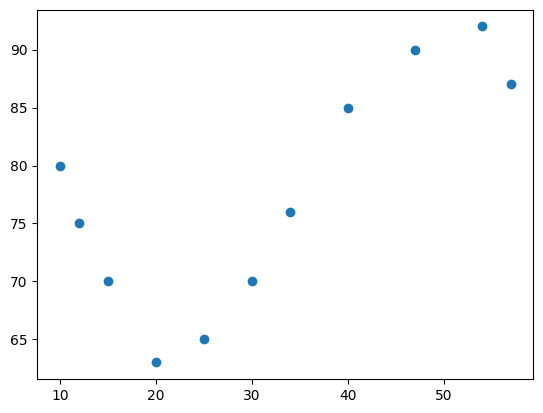

In [ ]:
x = np.array([10, 12, 15, 20, 25, 30, 34, 40, 47, 54, 57])[:, np.newaxis]
y = np.array([80, 75, 70, 63, 65, 70, 76, 85, 90, 92, 87 ])

plt.scatter(x, y) # Изображаем точки на графике
plt.show()

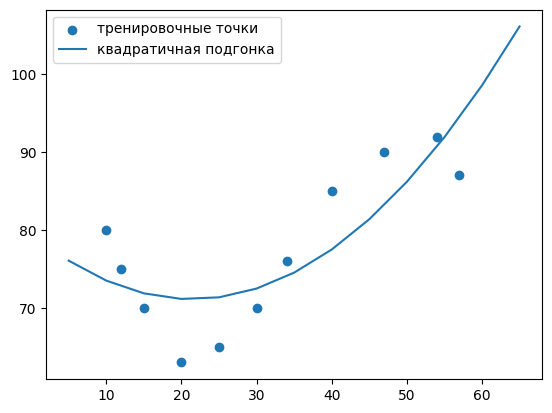

In [ ]:
x_ = np.arange(5, 70, 5)[:, np.newaxis] # Точки для предсказания

x_quad = quadratic.fit_transform(x) # преобразуем данные
pr.fit(x_quad, y) # Обучаем полиномиальную регрессию
y_pr = pr.predict(quadratic.fit_transform(x_)) # Предсказываем y для полиномиальной регрессии

plt.scatter(x, y, label = 'тренировочные точки')
plt.plot(x_, y_pr, label = 'квадратичная подгонка')
plt.legend(loc='upper left')
plt.show()

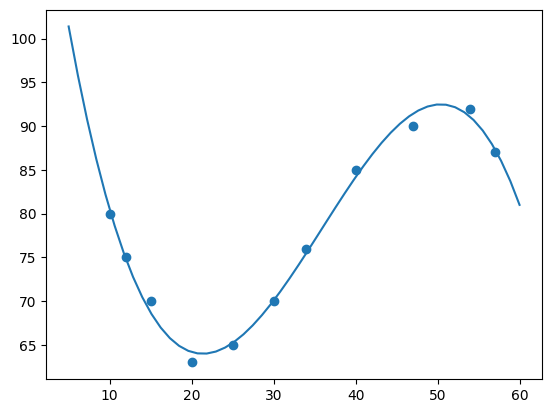

In [ ]:
x = np.array([10, 12, 15, 20, 25, 30, 34, 40, 47, 54, 57])
y = np.array([80, 75, 70, 63, 65, 70, 76, 85, 90, 92, 87 ])

model = np.poly1d(np.polyfit(x, y, 3))

polyline = np.linspace(5, 60, 50)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()

### Задание 3. Какую степень полинома вы использовали? Попробуйте изменить степень полинома, например, на 2, 5, 15? Как меняется результат?

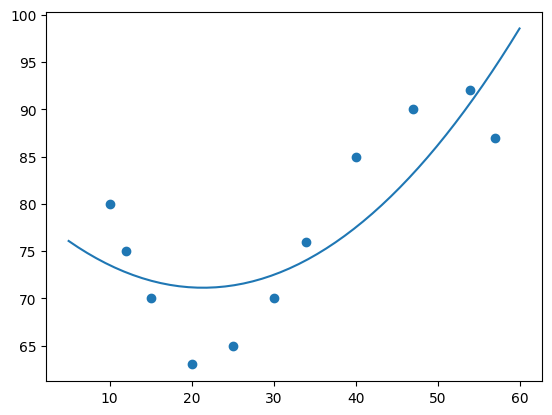

In [ ]:
model = np.poly1d(np.polyfit(x, y, 2))

polyline = np.linspace(5, 60, 50)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()

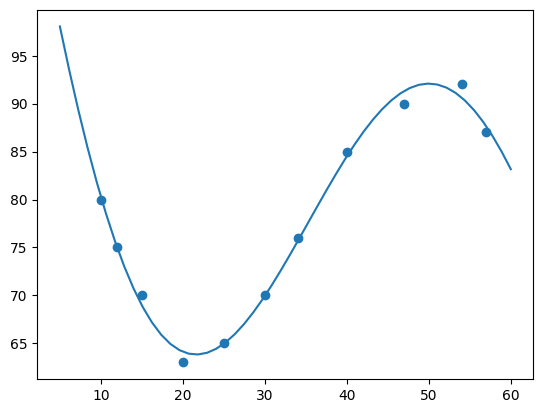

In [ ]:
model = np.poly1d(np.polyfit(x, y, 5))

polyline = np.linspace(5, 60, 50)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()

<ipython-input-90-325aaabe3803>:1: RankWarning: Polyfit may be poorly conditioned
  model = np.poly1d(np.polyfit(x, y, 15))


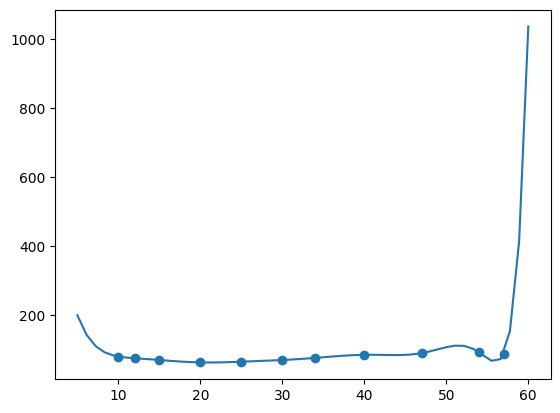

In [ ]:
model = np.poly1d(np.polyfit(x, y, 15))

polyline = np.linspace(5, 60, 50)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()